In [1]:
import warnings
warnings.filterwarnings('ignore');

In [2]:
import numpy as np, pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import r2_score
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [3]:
#reading the data
dataset = pd.read_csv("day.csv")

In [4]:
#lets look at the number of rows and columns in our dataset
dataset.shape

(730, 16)

In [5]:
#lets know what all columns we have in our dataset
dataset.columns

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')

In [6]:
#lets know the dataypes of these columns
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [7]:
#..as we can see there is no nulls, let get confirmed
print(dataset.isnull().sum())

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64


In [8]:
dataset.head(10)

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600
5,6,06-01-2018,1,0,1,0,4,1,1,8.378268,11.66045,51.8261,6.000868,88,1518,1606
6,7,07-01-2018,1,0,1,0,5,1,2,8.057402,10.44195,49.8696,11.304642,148,1362,1510
7,8,08-01-2018,1,0,1,0,6,0,2,6.765000,8.11270,53.5833,17.875868,68,891,959
8,9,09-01-2018,1,0,1,0,0,0,1,5.671653,5.80875,43.4167,24.250650,54,768,822
9,10,10-01-2018,1,0,1,0,1,1,1,6.184153,7.54440,48.2917,14.958889,41,1280,1321


In [9]:
# from above we can see that instant is an index column which is not useful in our current analysis.
# data dictionary also confirms it. 
# Hence, dropping the instant column.
dataset.drop(['instant'],axis=1,inplace=True)
#we will be using 'yr','mnth' columns in our analysis. Column 'dteday' is of no use in our analysis so droping the column.
dataset.drop(['dteday'],axis=1,inplace=True)
#we observe that casual+registered = cnt and cnt is our target variable. Hence, dropping casual and registered.
dataset.drop(['casual','registered'],axis=1,inplace=True)

In [10]:
dataset.columns

Index(['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday',
       'weathersit', 'temp', 'atemp', 'hum', 'windspeed', 'cnt'],
      dtype='object')

In [11]:
#From the Data dictionary lets substitute proper names to variables.
#Replacing the variables such as season, weathersit, weekday, mnth with appropriate values.
dataset['season'].replace({1:"spring",2:"summer",3:"fall",4:"winter"},inplace=True)
dataset['weathersit'].replace({1:"Partly_Cloudy",2:"Mist_Cloudy",3:"Light_Snow",4:'Ice_Pallets_Storm'},inplace=True)
dataset['weekday'].replace({0:"Sunday",1:"Monday",2:"Tuesday",3:"Wednesday",4:"Thursday",5:"Friday",6:"Saturday"},inplace=True)
dataset['mnth'].replace({1: 'January',2: 'February', 3:'March', 4:'April', 5:'May', 6:'June', 7:'July', 8: 'August',
                                9: 'September', 10:'October', 11: 'November', 12: 'December'},inplace=True)

In [12]:
dataset.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,spring,0,January,0,Saturday,0,Mist_Cloudy,14.110847,18.18125,80.5833,10.749882,985
1,spring,0,January,0,Sunday,0,Mist_Cloudy,14.902598,17.68695,69.6087,16.652113,801
2,spring,0,January,0,Monday,1,Partly_Cloudy,8.050924,9.47025,43.7273,16.636703,1349
3,spring,0,January,0,Tuesday,1,Partly_Cloudy,8.200000,10.60610,59.0435,10.739832,1562
4,spring,0,January,0,Wednesday,1,Partly_Cloudy,9.305237,11.46350,43.6957,12.522300,1600


In [13]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    object 
 1   yr          730 non-null    int64  
 2   mnth        730 non-null    object 
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    object 
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    object 
 7   temp        730 non-null    float64
 8   atemp       730 non-null    float64
 9   hum         730 non-null    float64
 10  windspeed   730 non-null    float64
 11  cnt         730 non-null    int64  
dtypes: float64(4), int64(4), object(4)
memory usage: 68.6+ KB


In [14]:
dataset.shape

(730, 12)

In [15]:
#from the provided data dictionary we found that: season, yr, mnth, holiday, weekday, workingday, weathersit 
#all are CATEGORICAL VARIABLES.
#from the provided data dictionary we found that: temp, atemp, hum, windspeed, cnt
#all are NUMERIC VARIABLES.

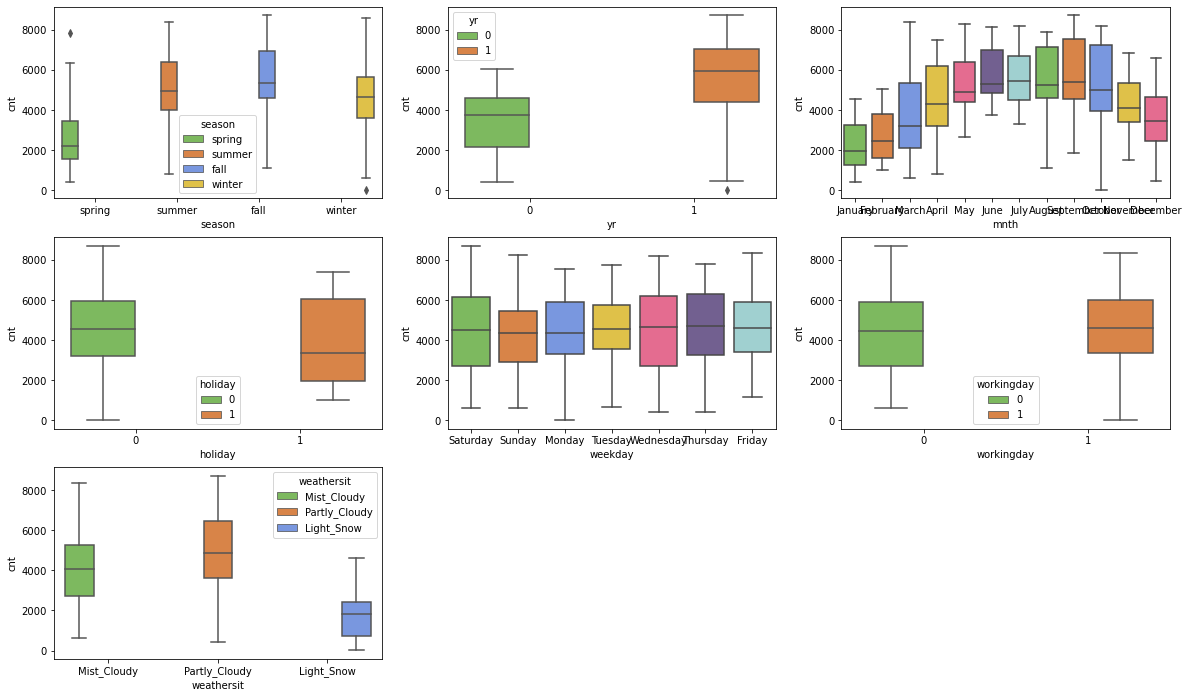

In [16]:
#Visualising CATEGORICAL VARIABLES:

colors = ['#78C850', '#F08030', '#6890F0','#F8D030', '#F85888', '#705898', '#98D8D8']
plt.figure(figsize=(20,12))
plt.subplot(3,3,1)
sns.boxplot(x='season', y='cnt', data=dataset, hue = 'season', palette = colors);
plt.subplot(3,3,2)
sns.boxplot(x='yr', y='cnt', data=dataset, hue = 'yr', palette = colors);
plt.subplot(3,3,3)
sns.boxplot(x='mnth', y='cnt', data=dataset, palette = colors); #hue = 'mnth',
plt.subplot(3,3,4)
sns.boxplot(x='holiday', y='cnt', data=dataset, hue = 'holiday', palette = colors);
plt.subplot(3,3,5)
sns.boxplot(x='weekday', y='cnt', data=dataset, palette = colors); # hue = 'weekday',
plt.subplot(3,3,6)
sns.boxplot(x='workingday', y='cnt', data=dataset, hue = 'workingday', palette = colors);
plt.subplot(3,3,7)
sns.boxplot(x='weathersit', y='cnt', data=dataset, hue = 'weathersit', palette = colors);

#X-axis categorical variable
#Y-axis Target Variable 'cnt'

In [17]:
# lets create a function to generate barplots for categorical variables.
def generate_barplots(col):
    plt.figure(figsize = (8,10))
    plt.subplot(2,1,1)
    sns.barplot(x='cnt', y=col, data=dataset,palette='crest')
    plt.subplot(2,1,2)
    sns.barplot(x='cnt', y=col, data=dataset, hue='yr',palette='crest')
   # plt.legend(labels=['2018', '2019'])
    plt.show()

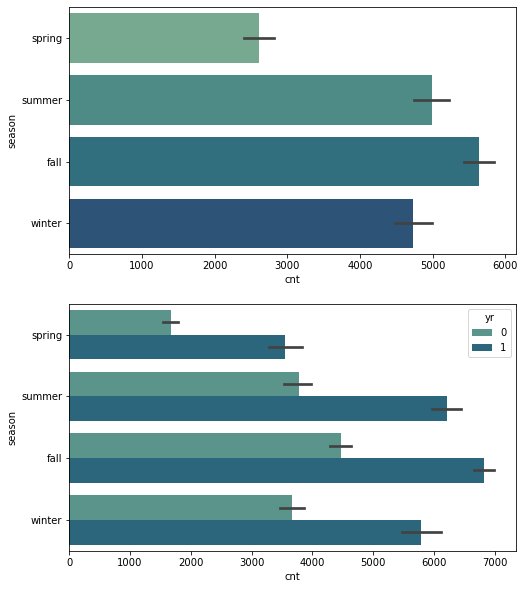

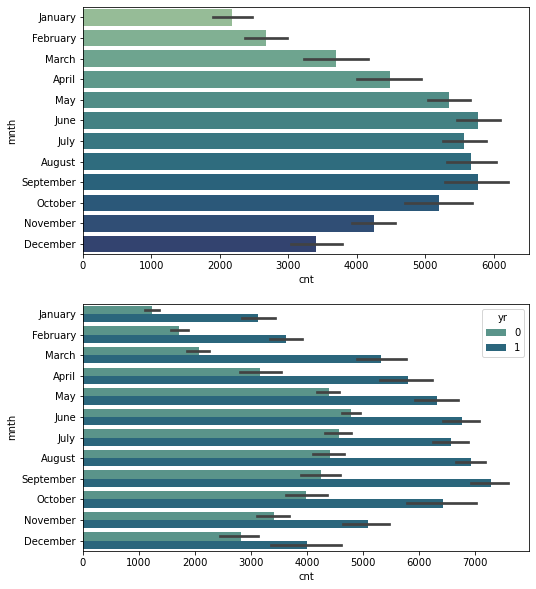

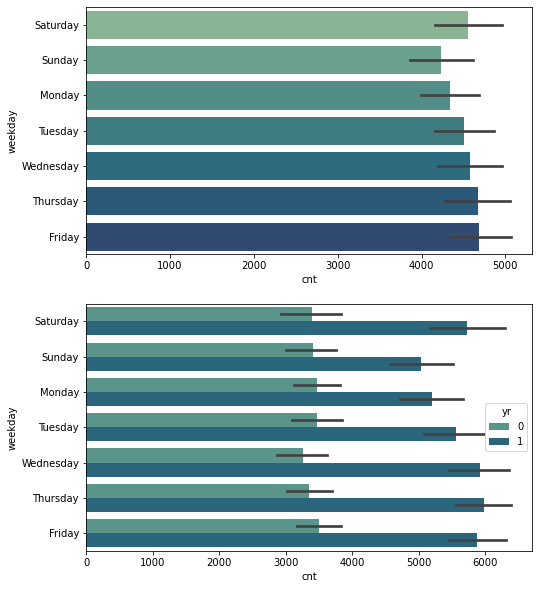

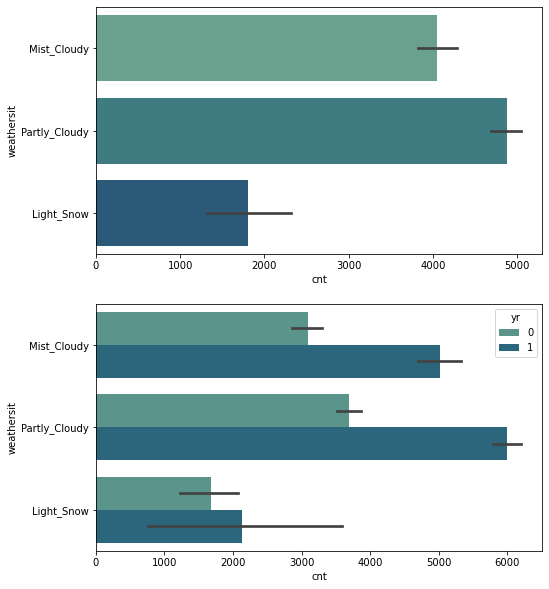

In [18]:
# plotting visualization for season, yr, mnth, holiday, weekday, workingday, weathersit 
generate_barplots('season')
generate_barplots('mnth')
generate_barplots('weekday')
generate_barplots('weathersit')

<AxesSubplot:xlabel='windspeed', ylabel='cnt'>

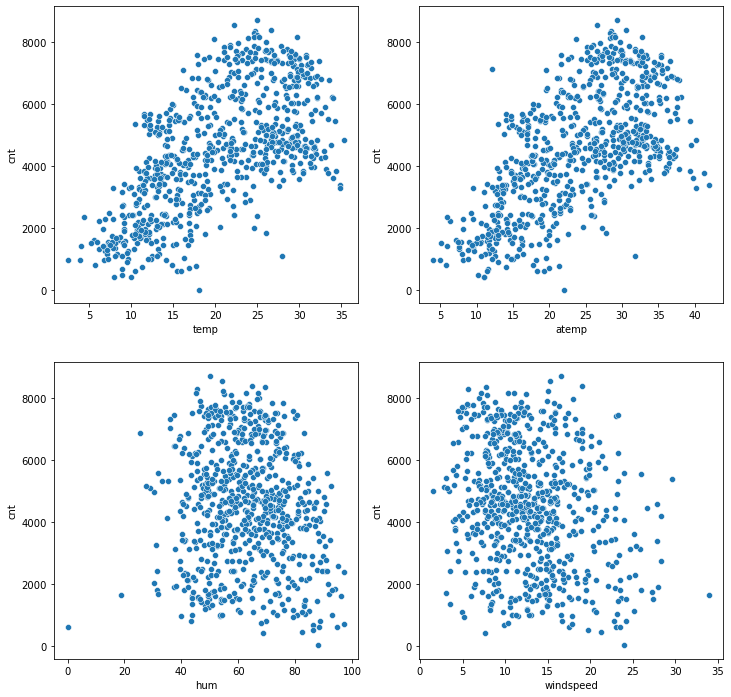

In [19]:
#Visualising NUMERICAL VARIABLES: temp, atemp, hum, windspeed, cnt
#We will use scatterplot and see Correlation among variables.
plt.figure(figsize=(12,12))
plt.subplot(2,2,1) 
# temp, atemp, hum
sns.scatterplot(x="temp", y="cnt", data=dataset)
plt.subplot(2,2,2)
sns.scatterplot(x="atemp", y="cnt", data=dataset)
plt.subplot(2,2,3)
sns.scatterplot(x="hum", y="cnt", data=dataset)
plt.subplot(2,2,4)
sns.scatterplot(x="windspeed", y="cnt", data=dataset)

#X-axis Numeric variable
#Y-axis Target Variable 'cnt'

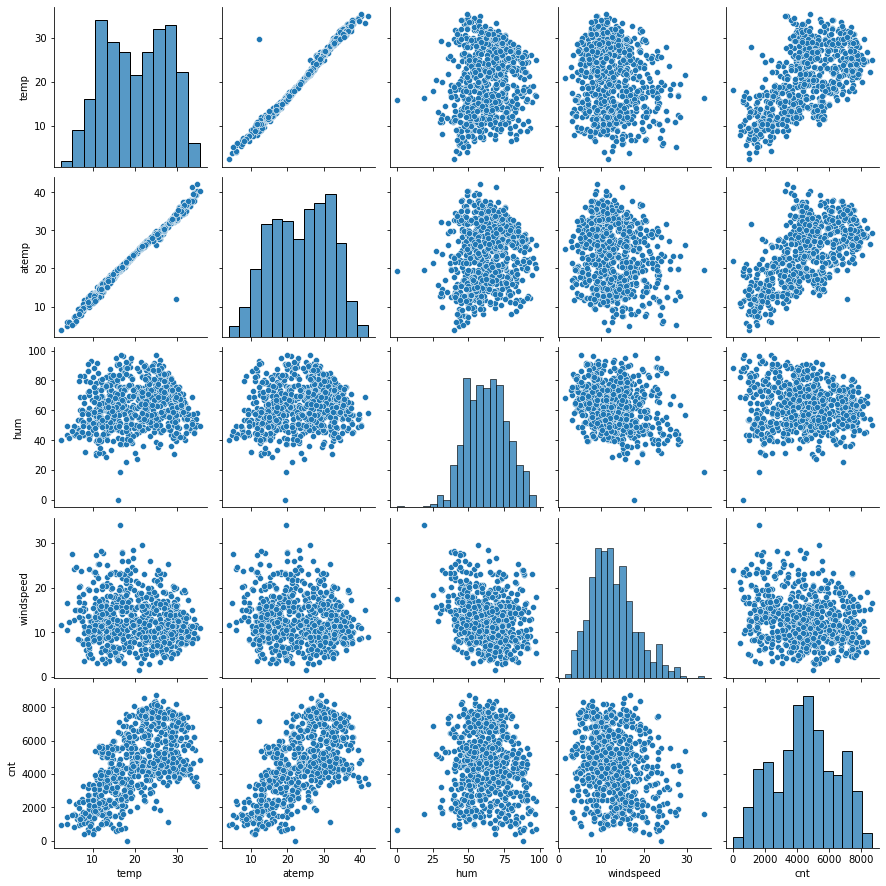

In [20]:
#We will use pairplots to see side by side the variables and see Correlation among variables.
sns.pairplot(data=dataset,vars=['temp','atemp','hum','windspeed','cnt'],diag_kind="hist")
plt.show()

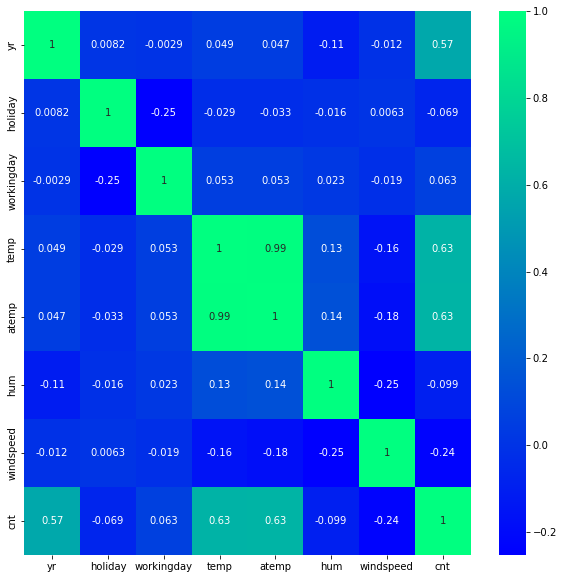

In [21]:
# We can see temp and atemp to be almost similar pattern. However, we can plot a correlation matrix and check.
# Check for correlation between variables
plt.figure(figsize = (10, 10))
sns.heatmap(dataset.corr(), annot= True, cmap="winter")
plt.show()

### Now we have seen the relationship between the variables, lets Preparing the Data for Model.

In [22]:
#Convert Categorical variables to Dummy Variables : season, mnth, weekday, weathersit

seasons=pd.get_dummies(dataset.season,drop_first=True)
months=pd.get_dummies(dataset.mnth,drop_first=True)
weekdays=pd.get_dummies(dataset.weekday,drop_first=True)
weathersits=pd.get_dummies(dataset.weathersit,drop_first=True)

In [23]:
dataset.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,spring,0,January,0,Saturday,0,Mist_Cloudy,14.110847,18.18125,80.5833,10.749882,985
1,spring,0,January,0,Sunday,0,Mist_Cloudy,14.902598,17.68695,69.6087,16.652113,801
2,spring,0,January,0,Monday,1,Partly_Cloudy,8.050924,9.47025,43.7273,16.636703,1349
3,spring,0,January,0,Tuesday,1,Partly_Cloudy,8.200000,10.60610,59.0435,10.739832,1562
4,spring,0,January,0,Wednesday,1,Partly_Cloudy,9.305237,11.46350,43.6957,12.522300,1600


In [24]:
# Merging  the dataframe, with the dummy variable dataset. 
dataset2 = pd.concat([dataset,months,weekdays,weathersits,seasons],axis=1)

In [25]:
dataset2.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,...,Saturday,Sunday,Thursday,Tuesday,Wednesday,Mist_Cloudy,Partly_Cloudy,spring,summer,winter
0,spring,0,January,0,Saturday,0,Mist_Cloudy,14.110847,18.18125,80.5833,...,1,0,0,0,0,1,0,1,0,0
1,spring,0,January,0,Sunday,0,Mist_Cloudy,14.902598,17.68695,69.6087,...,0,1,0,0,0,1,0,1,0,0
2,spring,0,January,0,Monday,1,Partly_Cloudy,8.050924,9.47025,43.7273,...,0,0,0,0,0,0,1,1,0,0
3,spring,0,January,0,Tuesday,1,Partly_Cloudy,8.200000,10.60610,59.0435,...,0,0,0,1,0,0,1,1,0,0
4,spring,0,January,0,Wednesday,1,Partly_Cloudy,9.305237,11.46350,43.6957,...,0,0,0,0,1,0,1,1,0,0


In [26]:
dataset2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 34 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   season         730 non-null    object 
 1   yr             730 non-null    int64  
 2   mnth           730 non-null    object 
 3   holiday        730 non-null    int64  
 4   weekday        730 non-null    object 
 5   workingday     730 non-null    int64  
 6   weathersit     730 non-null    object 
 7   temp           730 non-null    float64
 8   atemp          730 non-null    float64
 9   hum            730 non-null    float64
 10  windspeed      730 non-null    float64
 11  cnt            730 non-null    int64  
 12  August         730 non-null    uint8  
 13  December       730 non-null    uint8  
 14  February       730 non-null    uint8  
 15  January        730 non-null    uint8  
 16  July           730 non-null    uint8  
 17  June           730 non-null    uint8  
 18  March     

In [27]:
# dropping unnecessary columns as we have already created dummy variable out of it.

dataset2.drop(['season','mnth','weekday','weathersit'], axis = 1, inplace = True)

In [28]:
dataset2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 30 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   yr             730 non-null    int64  
 1   holiday        730 non-null    int64  
 2   workingday     730 non-null    int64  
 3   temp           730 non-null    float64
 4   atemp          730 non-null    float64
 5   hum            730 non-null    float64
 6   windspeed      730 non-null    float64
 7   cnt            730 non-null    int64  
 8   August         730 non-null    uint8  
 9   December       730 non-null    uint8  
 10  February       730 non-null    uint8  
 11  January        730 non-null    uint8  
 12  July           730 non-null    uint8  
 13  June           730 non-null    uint8  
 14  March          730 non-null    uint8  
 15  May            730 non-null    uint8  
 16  November       730 non-null    uint8  
 17  October        730 non-null    uint8  
 18  September 

In [29]:
dataset = dataset2

In [30]:
dataset.shape

(730, 30)

In [31]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 30 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   yr             730 non-null    int64  
 1   holiday        730 non-null    int64  
 2   workingday     730 non-null    int64  
 3   temp           730 non-null    float64
 4   atemp          730 non-null    float64
 5   hum            730 non-null    float64
 6   windspeed      730 non-null    float64
 7   cnt            730 non-null    int64  
 8   August         730 non-null    uint8  
 9   December       730 non-null    uint8  
 10  February       730 non-null    uint8  
 11  January        730 non-null    uint8  
 12  July           730 non-null    uint8  
 13  June           730 non-null    uint8  
 14  March          730 non-null    uint8  
 15  May            730 non-null    uint8  
 16  November       730 non-null    uint8  
 17  October        730 non-null    uint8  
 18  September 

### Rescaling the Numeric Variables
#### It is extremely important to rescale the variables so that they have a comparable scale. 
#### If we don't have comparable scales, then some of the coefficients as obtained by fitting the regression model might be very            large or very small as compared to the other coefficients. This might become very annoying at the time of model evaluation.
#### Here I will be using MinMax scaling to normalise the numeric data between 0 and 1, i.e., on a comparable scale.
### Lets split the dataset into Train Set & Test Set.

In [32]:
#Lets split the dataset into Train Set & Test Set
dataset_train, dataset_test = train_test_split(dataset, train_size = 0.7, random_state = 100)
print(dataset_train.shape)
print(dataset_test.shape)

(510, 30)
(220, 30)


In [33]:
# Scaling the numeric variables and not the dummy variables.
scaler = MinMaxScaler()
# 2. Create a list of numeric variables
var = ['temp', 'atemp', 'hum', 'windspeed', 'cnt']
dataset_train[var].head()

,temp,atemp,hum,windspeed,cnt
576,29.246653,33.1448,70.4167,11.083475,7216
426,16.980847,20.6746,62.1250,10.792293,4066
728,10.489153,11.5850,48.3333,23.500518,1796
482,15.443347,18.8752,48.9583,8.708325,4220
111,13.803347,16.0977,72.9583,14.707907,1683


In [34]:
#applying the fit transform function
dataset_train[var] = scaler.fit_transform(dataset_train[var])
dataset_train.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,August,December,...,Saturday,Sunday,Thursday,Tuesday,Wednesday,Mist_Cloudy,Partly_Cloudy,spring,summer,winter
576,1,0,1,0.815169,0.766351,0.725633,0.264686,0.827658,0,0,...,0,0,0,1,0,0,1,0,0,0
426,1,0,0,0.442393,0.438975,0.640189,0.255342,0.465255,0,0,...,1,0,0,0,0,1,0,1,0,0
728,1,0,0,0.245101,0.200348,0.498067,0.663106,0.204096,0,1,...,0,1,0,0,0,0,1,1,0,0
482,1,0,0,0.395666,0.391735,0.504508,0.188475,0.482973,0,0,...,1,0,0,0,0,1,0,0,1,0
111,0,0,1,0.345824,0.318819,0.751824,0.380981,0.191095,0,0,...,0,0,0,0,0,1,0,0,1,0


In [35]:
dataset_train[var].describe()

,temp,atemp,hum,windspeed,cnt
count,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.537440,0.513156,0.650480,0.320883,0.513499
std,0.225858,0.212410,0.145846,0.169803,0.224421
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.339853,0.332086,0.538643,0.199179,0.356420
50%,0.542596,0.529718,0.653714,0.296763,0.518638
75%,0.735215,0.688457,0.754830,0.414447,0.684710
max,1.000000,1.000000,1.000000,1.000000,1.000000


### Lets start building the Model. Lets now devide the Dataset into X & Y sets

In [36]:
# X_train, y_train
y_train = dataset_train.pop('cnt')
X_train = dataset_train
X_train.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,August,December,February,...,Saturday,Sunday,Thursday,Tuesday,Wednesday,Mist_Cloudy,Partly_Cloudy,spring,summer,winter
576,1,0,1,0.815169,0.766351,0.725633,0.264686,0,0,0,...,0,0,0,1,0,0,1,0,0,0
426,1,0,0,0.442393,0.438975,0.640189,0.255342,0,0,0,...,1,0,0,0,0,1,0,1,0,0
728,1,0,0,0.245101,0.200348,0.498067,0.663106,0,1,0,...,0,1,0,0,0,0,1,1,0,0
482,1,0,0,0.395666,0.391735,0.504508,0.188475,0,0,0,...,1,0,0,0,0,1,0,0,1,0
111,0,0,1,0.345824,0.318819,0.751824,0.380981,0,0,0,...,0,0,0,0,0,1,0,0,1,0


In [37]:
# Running RFE with the output number of the variable equal to 15
lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm,n_features_to_select=15)

# running RFE
rfe = rfe.fit(X_train, y_train)

In [38]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', True, 1),
 ('temp', True, 1),
 ('atemp', False, 5),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('August', False, 7),
 ('December', False, 3),
 ('February', False, 4),
 ('January', True, 1),
 ('July', True, 1),
 ('June', False, 14),
 ('March', False, 15),
 ('May', False, 6),
 ('November', False, 2),
 ('October', False, 13),
 ('September', True, 1),
 ('Monday', False, 9),
 ('Saturday', True, 1),
 ('Sunday', False, 8),
 ('Thursday', False, 11),
 ('Tuesday', False, 10),
 ('Wednesday', False, 12),
 ('Mist_Cloudy', True, 1),
 ('Partly_Cloudy', True, 1),
 ('spring', True, 1),
 ('summer', True, 1),
 ('winter', True, 1)]

In [39]:
# The RFE selected variables are:
X_train.columns[rfe.support_]

Index(['yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed', 'January',
       'July', 'September', 'Saturday', 'Mist_Cloudy', 'Partly_Cloudy',
       'spring', 'summer', 'winter'],
      dtype='object')

In [40]:
# The RFE rejected variables are:
X_train.columns[~rfe.support_]

Index(['atemp', 'August', 'December', 'February', 'June', 'March', 'May',
       'November', 'October', 'Monday', 'Sunday', 'Thursday', 'Tuesday',
       'Wednesday'],
      dtype='object')

In [41]:
def get_VIF(df):
    vif = pd.DataFrame()
    vif['Features'] = df.columns
    vif['VIF'] = [variance_inflation_factor(df.values, i) for i in range(df.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    return vif 

In [42]:
# dataframe with RFE selected variables
colm = X_train.columns[rfe.support_]
X_train_rfe = X_train[colm]

In [43]:
# get the VIF value
get_VIF(X_train_rfe)

,Features,VIF
4,hum,25.63
3,temp,22.84
11,Partly_Cloudy,14.80
10,Mist_Cloudy,9.07
12,spring,5.69
2,workingday,5.42
5,windspeed,4.69
14,winter,4.12
13,summer,3.21
0,yr,2.10


In [44]:
# Building 1st linear regression model
X_train_lm_1 = sm.add_constant(X_train_rfe)
lr_1 = sm.OLS(y_train,X_train_lm_1).fit()
print(lr_1.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.848
Model:                            OLS   Adj. R-squared:                  0.844
Method:                 Least Squares   F-statistic:                     184.0
Date:                Tue, 16 Aug 2022   Prob (F-statistic):          4.22e-191
Time:                        16:14:14   Log-Likelihood:                 519.65
No. Observations:                 510   AIC:                            -1007.
Df Residuals:                     494   BIC:                            -939.5
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.0044      0.048      0.092

In [45]:
# 'hum' shows high VIF value. Hence we can drop it.
X_train_new = X_train_rfe.drop(['hum'], axis = 1)

# Run the function to calculate VIF for the new model
get_VIF(X_train_new)

,Features,VIF
10,Partly_Cloudy,14.79
3,temp,13.96
9,Mist_Cloudy,8.48
2,workingday,5.34
4,windspeed,4.67
11,spring,4.48
12,summer,2.79
13,winter,2.74
0,yr,2.08
8,Saturday,1.99


In [46]:
# Building 2nd linear regression model

X_train_lm_2 = sm.add_constant(X_train_new)
lr_2 = sm.OLS(y_train,X_train_lm_2).fit()
print(lr_2.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.843
Model:                            OLS   Adj. R-squared:                  0.838
Method:                 Least Squares   F-statistic:                     189.6
Date:                Tue, 16 Aug 2022   Prob (F-statistic):          1.60e-188
Time:                        16:14:14   Log-Likelihood:                 510.75
No. Observations:                 510   AIC:                            -991.5
Df Residuals:                     495   BIC:                            -928.0
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const            -0.1171      0.039     -2.980

In [47]:
# 'holiday' shows high VIF value. Hence we can drop it.
X_train_new = X_train_new.drop(['holiday'], axis = 1)

# Run the function to calculate VIF for the new model
get_VIF(X_train_new)

,Features,VIF
9,Partly_Cloudy,14.66
2,temp,13.89
8,Mist_Cloudy,8.42
1,workingday,4.74
3,windspeed,4.66
10,spring,4.45
11,summer,2.78
12,winter,2.71
0,yr,2.08
7,Saturday,1.85


In [48]:
# Building 3rd linear regression model

X_train_lm_3 = sm.add_constant(X_train_new)
lr_3 = sm.OLS(y_train,X_train_lm_3).fit()
print(lr_3.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.841
Model:                            OLS   Adj. R-squared:                  0.837
Method:                 Least Squares   F-statistic:                     202.6
Date:                Tue, 16 Aug 2022   Prob (F-statistic):          8.68e-189
Time:                        16:14:14   Log-Likelihood:                 508.61
No. Observations:                 510   AIC:                            -989.2
Df Residuals:                     496   BIC:                            -929.9
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const            -0.1239      0.039     -3.154

In [49]:
# 'January' shows high p-value. Hence we can drop it.
X_train_new = X_train_new.drop(['January'], axis = 1)

# Run the function to calculate VIF for the new model
get_VIF(X_train_new)

,Features,VIF
8,Partly_Cloudy,14.28
2,temp,13.36
7,Mist_Cloudy,8.15
1,workingday,4.72
3,windspeed,4.63
9,spring,4.12
10,summer,2.78
11,winter,2.70
0,yr,2.07
6,Saturday,1.84


In [50]:
# Building 4th linear regression model

X_train_lm_4 = sm.add_constant(X_train_new)
lr_4 = sm.OLS(y_train,X_train_lm_4).fit()
print(lr_4.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.840
Model:                            OLS   Adj. R-squared:                  0.836
Method:                 Least Squares   F-statistic:                     217.2
Date:                Tue, 16 Aug 2022   Prob (F-statistic):          7.12e-189
Time:                        16:14:14   Log-Likelihood:                 506.01
No. Observations:                 510   AIC:                            -986.0
Df Residuals:                     497   BIC:                            -931.0
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const            -0.1391      0.039     -3.578

In [51]:
# We can drop July variable as it has high p-value
X_train_new = X_train_new.drop(['July'], axis = 1)

# Run the function to calculate VIF for the new model
get_VIF(X_train_new)

,Features,VIF
7,Partly_Cloudy,14.23
2,temp,12.42
6,Mist_Cloudy,8.14
1,workingday,4.72
3,windspeed,4.62
8,spring,3.98
10,winter,2.51
9,summer,2.41
0,yr,2.07
5,Saturday,1.84


In [52]:
# Building 5th linear regression model

X_train_lm_5 = sm.add_constant(X_train_new)
lr_5 = sm.OLS(y_train,X_train_lm_5).fit()
print(lr_5.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.838
Model:                            OLS   Adj. R-squared:                  0.834
Method:                 Least Squares   F-statistic:                     233.6
Date:                Tue, 16 Aug 2022   Prob (F-statistic):          1.42e-188
Time:                        16:14:15   Log-Likelihood:                 502.47
No. Observations:                 510   AIC:                            -980.9
Df Residuals:                     498   BIC:                            -930.1
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const            -0.1487      0.039     -3.819

In [53]:
# We can drop Partly_Cloudy variable as it has high p-value
X_train_new = X_train_new.drop(['Partly_Cloudy'], axis = 1)

In [54]:
# Run the function to calculate VIF for the new model
get_VIF(X_train_new)

,Features,VIF
2,temp,5.47
1,workingday,4.63
3,windspeed,4.58
7,spring,2.29
0,yr,2.06
8,summer,2.00
5,Saturday,1.82
9,winter,1.74
6,Mist_Cloudy,1.54
4,September,1.22


In [55]:
# Building 6th linear regression model

X_train_lm_6 = sm.add_constant(X_train_new)
lr_6 = sm.OLS(y_train,X_train_lm_6).fit()
print(lr_6.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.793
Model:                            OLS   Adj. R-squared:                  0.788
Method:                 Least Squares   F-statistic:                     190.6
Date:                Tue, 16 Aug 2022   Prob (F-statistic):          2.59e-163
Time:                        16:14:15   Log-Likelihood:                 439.93
No. Observations:                 510   AIC:                            -857.9
Df Residuals:                     499   BIC:                            -811.3
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           0.1348      0.035      3.903      

In [56]:
# Since temp has very high correlation with target variable so We can drop july variable whose p-value~0.05.
X_train_new = X_train_new.drop(['spring'], axis = 1)

In [57]:
# Run the function to calculate VIF for the new model
get_VIF(X_train_new)

,Features,VIF
2,temp,4.76
1,workingday,4.02
3,windspeed,3.40
0,yr,2.01
5,Saturday,1.68
7,summer,1.57
6,Mist_Cloudy,1.50
8,winter,1.38
4,September,1.20


In [58]:
# Building 7th linear regression model

X_train_lm_7 = sm.add_constant(X_train_new)
lr_7 = sm.OLS(y_train,X_train_lm_7).fit()
print(lr_7.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.791
Model:                            OLS   Adj. R-squared:                  0.787
Method:                 Least Squares   F-statistic:                     210.0
Date:                Tue, 16 Aug 2022   Prob (F-statistic):          1.38e-163
Time:                        16:14:15   Log-Likelihood:                 437.81
No. Observations:                 510   AIC:                            -855.6
Df Residuals:                     500   BIC:                            -813.3
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           0.0786      0.021      3.751      

#### The above model lr_7 shows very low multicolinearity between the predictors and the p-values for all the predictors seems to be significant.
#### F-Statistics value is 210.0 (which is greater than 1) and the p-value of 1.38e-163 i.e almost equals to zero, states that the overall model is significant
#### (R-squared: 0.791--- Adj. R-squared: 0.787)

In [59]:
# Checking the parameters and their coefficient values
lr_7.params

const          0.078577
yr             0.238817
workingday     0.047912
temp           0.551390
windspeed     -0.183844
September      0.087581
Saturday       0.059108
Mist_Cloudy   -0.066337
summer         0.088617
winter         0.116112
dtype: float64

#### Residual Analysis:

In [60]:
X_train_lm_7

,const,yr,workingday,temp,windspeed,September,Saturday,Mist_Cloudy,summer,winter
576,1.0,1,1,0.815169,0.264686,0,0,0,0,0
426,1.0,1,0,0.442393,0.255342,0,1,1,0,0
728,1.0,1,0,0.245101,0.663106,0,0,0,0,0
482,1.0,1,0,0.395666,0.188475,0,1,1,1,0
111,1.0,0,1,0.345824,0.380981,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...
578,1.0,1,1,0.863973,0.187140,0,0,0,0,0
53,1.0,0,1,0.202618,0.111379,0,0,0,0,0
350,1.0,0,0,0.248216,0.431816,0,1,1,0,1
79,1.0,0,1,0.462664,0.529881,0,0,1,1,0


In [61]:
y_train_pred = lr_7.predict(X_train_lm_7)

Text(0.5, 0, 'Errors')

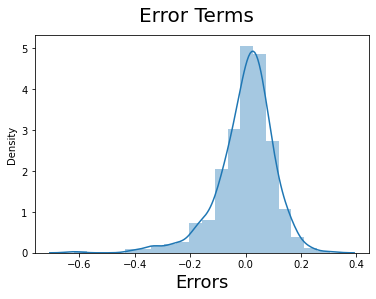

In [62]:
# Plot the histogram of the error terms

fig = plt.figure()
sns.distplot((y_train - y_train_pred), bins = 20)
fig.suptitle('Error Terms', fontsize = 20) 
plt.xlabel('Errors', fontsize = 18)

In [63]:
get_VIF(X_train_new)

,Features,VIF
2,temp,4.76
1,workingday,4.02
3,windspeed,3.40
0,yr,2.01
5,Saturday,1.68
7,summer,1.57
6,Mist_Cloudy,1.50
8,winter,1.38
4,September,1.20


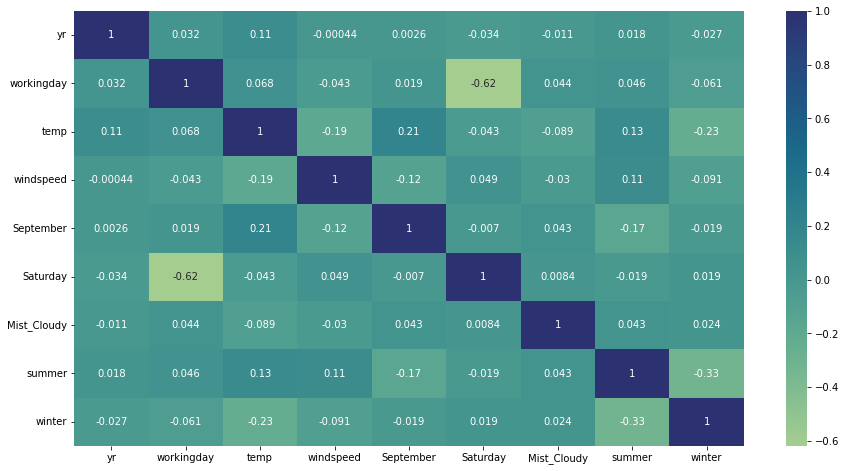

In [64]:
plt.figure(figsize=(15,8))
sns.heatmap(X_train_new.corr(),annot = True, cmap="crest")
plt.show()

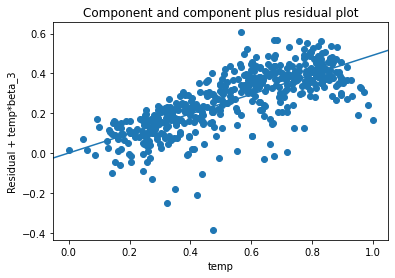

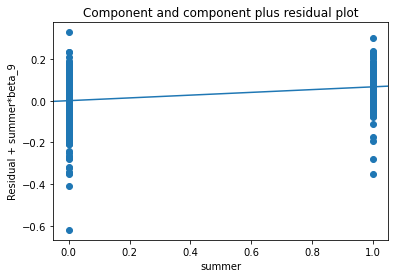

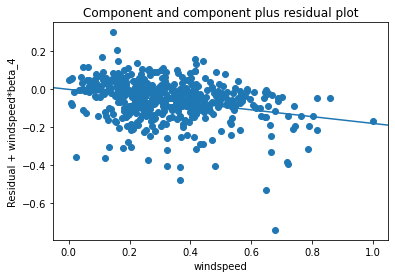

In [65]:
# Linear relationship validation using CCPR plot
# Component and component plus residual plot

sm.graphics.plot_ccpr(lr_6, 'temp')
plt.show()

sm.graphics.plot_ccpr(lr_6, 'summer')
plt.show()

sm.graphics.plot_ccpr(lr_6, 'windspeed')
plt.show()

#### Homoscedasticity
##### a condition in which the variance of the residual, or error term, in a regression model is constant. That is, the error term does not vary much as the value of the predictor variable changes.

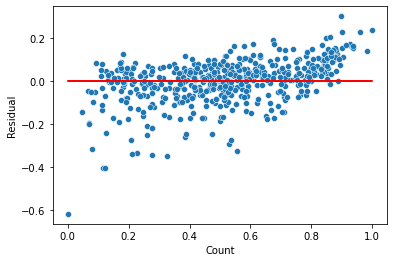

In [66]:
# Homoscedasticity
y_train_pred = lr_7.predict(X_train_lm_7)
residual = y_train - y_train_pred
sns.scatterplot(y_train,residual)
plt.plot(y_train,(y_train - y_train), '-r')
plt.xlabel('Count')
plt.ylabel('Residual')
plt.show()

#### Predictions on the Test Dataset:

In [67]:
# Applying scaling on the test dataset
num_vars = ['temp', 'atemp', 'hum', 'windspeed','cnt']
dataset_test[num_vars] = scaler.transform(dataset_test[num_vars])
dataset_test.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,August,December,...,Saturday,Sunday,Thursday,Tuesday,Wednesday,Mist_Cloudy,Partly_Cloudy,spring,summer,winter
184,0,1,0,0.831783,0.769660,0.657364,0.084219,0.692706,0,0,...,0,0,0,0,0,1,0,0,0,0
535,1,0,1,0.901354,0.842587,0.610133,0.153728,0.712034,0,0,...,0,0,0,0,1,0,1,0,1,0
299,0,0,1,0.511964,0.496145,0.837699,0.334206,0.303382,0,0,...,0,0,1,0,0,1,0,0,0,1
221,0,0,1,0.881625,0.795343,0.437098,0.339570,0.547400,1,0,...,0,0,0,0,1,0,1,0,0,0
152,0,0,1,0.817246,0.741471,0.314298,0.537414,0.569029,0,0,...,0,0,1,0,0,0,1,0,1,0


In [68]:
dataset_test.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,August,December,...,Saturday,Sunday,Thursday,Tuesday,Wednesday,Mist_Cloudy,Partly_Cloudy,spring,summer,winter
count,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,...,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000
mean,0.481818,0.036364,0.700000,0.558718,0.532847,0.638221,0.313293,0.522154,0.059091,0.086364,...,0.118182,0.145455,0.163636,0.168182,0.100000,0.318182,0.654545,0.254545,0.263636,0.236364
std,0.500809,0.187620,0.459303,0.233187,0.217401,0.148694,0.159584,0.219163,0.236333,0.281541,...,0.323559,0.353363,0.370789,0.374881,0.300684,0.466833,0.476601,0.436599,0.441609,0.425817
min,0.000000,0.000000,0.000000,0.046591,0.025950,0.261915,-0.042808,0.048205,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.355429,0.344870,0.529197,0.198843,0.378595,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,1.000000,0.558172,0.544652,0.625590,0.300126,0.524678,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.755981,0.713308,0.743798,0.402718,0.677750,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,0.984424,0.980934,1.002146,0.807474,0.963300,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [69]:
y_test = dataset_test.pop('cnt')
X_test = dataset_test

In [70]:
col1 = X_train_new.columns

X_test = X_test[col1]

# Adding constant variable to test dataframe
X_test_lm_7 = sm.add_constant(X_test)

In [71]:
y_pred = lr_7.predict(X_test_lm_7)

In [72]:
r2 = r2_score(y_test, y_pred)
round(r2,4)

0.7692

#### Model Evaluation:

Text(0, 0.5, 'y_pred')

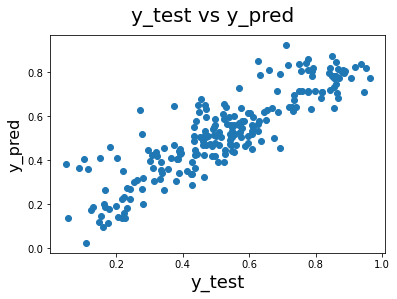

In [73]:
# Plotting y_test and y_pred to understand the spread

fig = plt.figure()
plt.scatter(y_test, y_pred)
fig.suptitle('y_test vs y_pred', fontsize = 20) 
plt.xlabel('y_test', fontsize = 18)
plt.ylabel('y_pred', fontsize = 16) 

In [74]:
round(lr_7.params,4)

const          0.0786
yr             0.2388
workingday     0.0479
temp           0.5514
windspeed     -0.1838
September      0.0876
Saturday       0.0591
Mist_Cloudy   -0.0663
summer         0.0886
winter         0.1161
dtype: float64

### Equation of the best fitting line: Plotting regression line
 `'cnt' = 0.0786 + yr * 0.2388 + workingday * 0.0479 + temp * 0.5514 - windspeed * 0.1838 + September * 0.0876 
   ``+ Saturday * 0.0591 - Mist_Cloudy * 0.0663 + summer * 0.0886 +  winter * 0.1161

In [75]:
# Calculating Adjusted-R^2 value for the test dataset

adjusted_r2 = round(1-(1-r2)*(X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1),4)
print(adjusted_r2)

0.7594


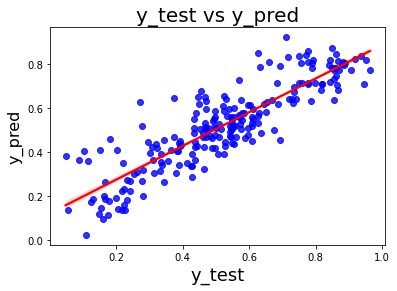

In [76]:
# Visualizing the fit on the test data
# plotting a Regression plot

plt.figure()
sns.regplot(x=y_test, y=y_pred, ci=68, fit_reg=True,scatter_kws={"color": "blue"}, line_kws={"color": "red"})
plt.title('y_test vs y_pred', fontsize=20)
plt.xlabel('y_test', fontsize=18)
plt.ylabel('y_pred', fontsize=16)
plt.show()

### Evaluating Correlation among Final Model Features.

In [77]:
finalModel = pd.concat([X_test_lm_7, y_test], axis =1)
finalModel.head()

,const,yr,workingday,temp,windspeed,September,Saturday,Mist_Cloudy,summer,winter,cnt
184,1.0,0,0,0.831783,0.084219,0,0,1,0,0,0.692706
535,1.0,1,1,0.901354,0.153728,0,0,0,1,0,0.712034
299,1.0,0,1,0.511964,0.334206,0,0,1,0,1,0.303382
221,1.0,0,1,0.881625,0.339570,0,0,0,0,0,0.547400
152,1.0,0,1,0.817246,0.537414,0,0,0,1,0,0.569029


In [78]:
finalModel.describe()

,const,yr,workingday,temp,windspeed,September,Saturday,Mist_Cloudy,summer,winter,cnt
count,220.0,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000
mean,1.0,0.481818,0.700000,0.558718,0.313293,0.086364,0.118182,0.318182,0.263636,0.236364,0.522154
std,0.0,0.500809,0.459303,0.233187,0.159584,0.281541,0.323559,0.466833,0.441609,0.425817,0.219163
min,1.0,0.000000,0.000000,0.046591,-0.042808,0.000000,0.000000,0.000000,0.000000,0.000000,0.048205
25%,1.0,0.000000,0.000000,0.355429,0.198843,0.000000,0.000000,0.000000,0.000000,0.000000,0.378595
50%,1.0,0.000000,1.000000,0.558172,0.300126,0.000000,0.000000,0.000000,0.000000,0.000000,0.524678
75%,1.0,1.000000,1.000000,0.755981,0.402718,0.000000,0.000000,1.000000,1.000000,0.000000,0.677750
max,1.0,1.000000,1.000000,0.984424,0.807474,1.000000,1.000000,1.000000,1.000000,1.000000,0.963300


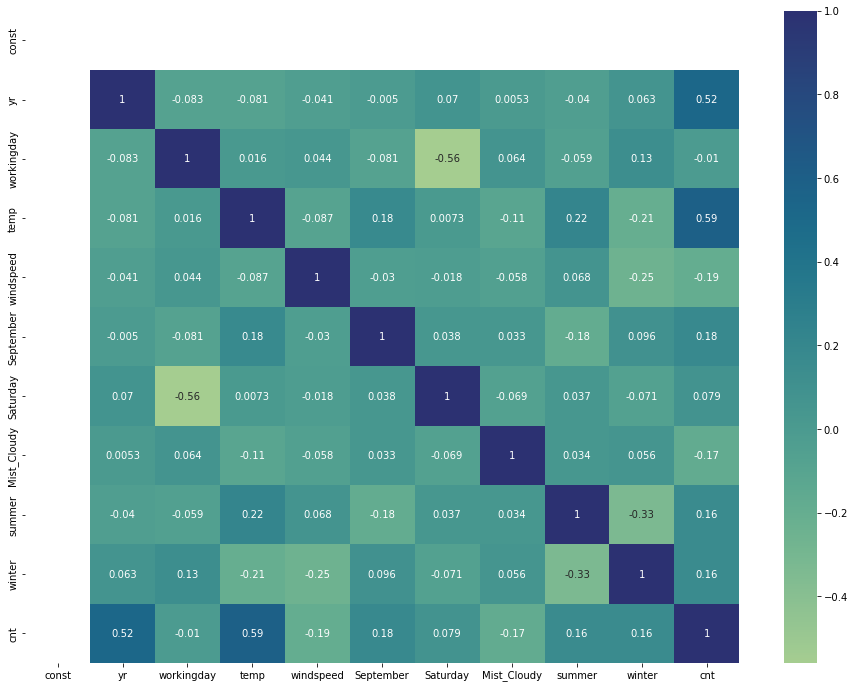

In [79]:
plt.figure(figsize = (16, 12))
sns.heatmap(finalModel.corr(), annot= True, cmap="crest")
plt.show()

#### So looking at above heatmap, we can infer following points:
1. `cnt` is highly dependent on `temp`
  - Total count of bikes rented increases with the increase in temperature
2. `cnt` is highly correlated with `yr`
  - The number of bikes rented in 2019 has increased from the previous year which is 2018. 
    This shows that BoomBikes customer base has increased.
3.  Negative correlation between season `summer`, `winter` and `windspeed`:
  - When the weather conditions are Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, 
    Mist the bike rental count decreases. 
  - Same happens when the windspeed is high. 